<a href="https://colab.research.google.com/github/NourhanDeifSayed/Mahcien-Learning-from-scratch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Define a linear equation
def linear_equation(x):
    return 2 * x + 1

In [ ]:
x_values = np.array([20,21,22,23,24])
y_values = linear_equation(x_values)


In [ ]:

x_values = x_values.reshape(-1, 1)
model = LinearRegression()
model.fit(x_values, y_values)
m = model.coef_[0]
b = model.intercept_
equation_without_noise = f'y = {m}x + {b}'

In [ ]:

x_values = x_values.reshape(-1, 1)
model = LinearRegression()
model.fit(x_values, y_values)
m = model.coef_[0]
b = model.intercept_
equation_without_noise = f'y = {m}x + {b}'

print("Equation without noise:", equation_without_noise)

Equation without noise: y = 2.0x + 1.0


In [ ]:

random_noise = np.random.uniform(0, 1, size=len(x_values))
y_values_with_noise = y_values + random_noise

model_with_noise = LinearRegression()
model_with_noise.fit(x_values, y_values_with_noise)
m_noise = model_with_noise.coef_[0]
b_noise = model_with_noise.intercept_
equation_with_noise = f'y = {m_noise}x + {b_noise}'

print("Equation with noise:", equation_with_noise)

Equation with noise: y = 1.9378202024869249x + 2.8282595685794405


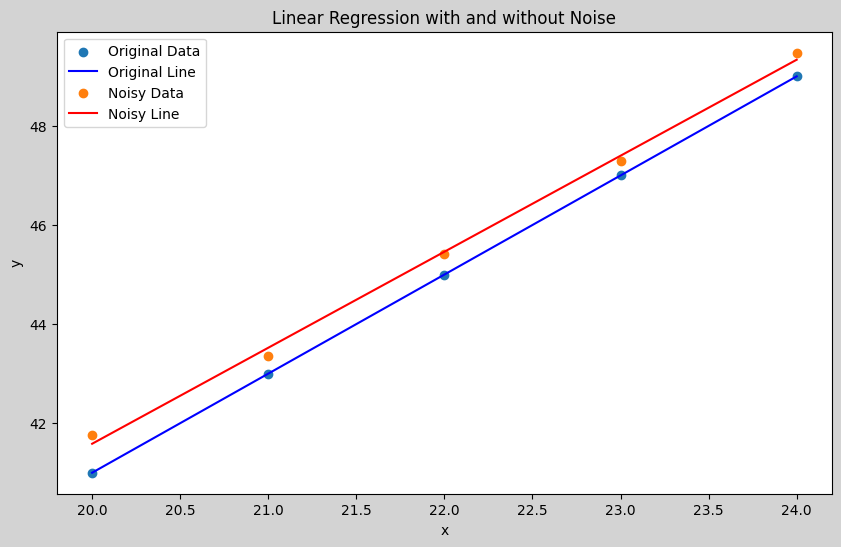

In [ ]:
plt.figure(figsize=(10, 6), facecolor='lightgrey')
plt.scatter(x_values, y_values, label='Original Data')
plt.plot(x_values, model.predict(x_values), color='blue', label='Original Line')
plt.scatter(x_values, y_values_with_noise, label='Noisy Data')
plt.plot(x_values, model_with_noise.predict(x_values), color='red', label='Noisy Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with and without Noise')
plt.legend()
plt.show()



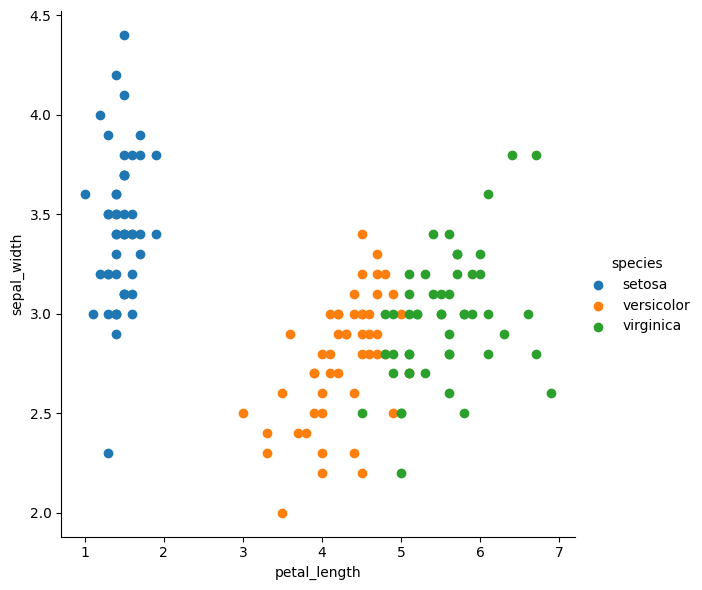

In [ ]:
iris=load_iris()

data=sns.load_dataset('iris')
sns.FacetGrid(data,hue="species",height=6).map(plt.scatter,"petal_length","sepal_width").add_legend()

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class LeastSquaresClassifier:
    def __init__(self):
        self.w = None

    def train(self, X, y):

        X = np.hstack((X, np.ones((X.shape[0], 1))))


        y_binary = np.where(y == 0, 1, -1)


        self.w = np.linalg.inv(X.T @ X) @ X.T @ y_binary

    def predict(self, X):

        X = np.hstack((X, np.ones((X.shape[0], 1))))

        y_pred = np.sign(X @ self.w)


        y_pred_original = np.where(y_pred == 1, 0, 2)

        return y_pred_original





In [ ]:

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

y[y == 2] = 1
y[y == 0] = -1


In [ ]:

X_class1_train, X_class1_test, y_class1_train, y_class1_test = train_test_split(
    X[y == -1], y[y == -1], test_size=10, random_state=42)


X_class2_train, X_class2_test, y_class2_train, y_class2_test = train_test_split(
    X[y == 1], y[y == 1], test_size=20, random_state=42)

X_train = np.concatenate((X_class1_train, X_class2_train))
y_train = np.concatenate((y_class1_train, y_class2_train))


X_test = np.concatenate((X_class1_test, X_class2_test))
y_test = np.concatenate((y_class1_test, y_class2_test))


classifier = LeastSquaresClassifier()
classifier.train(X_train, y_train)

y_pred = classifier.predict(X_test)

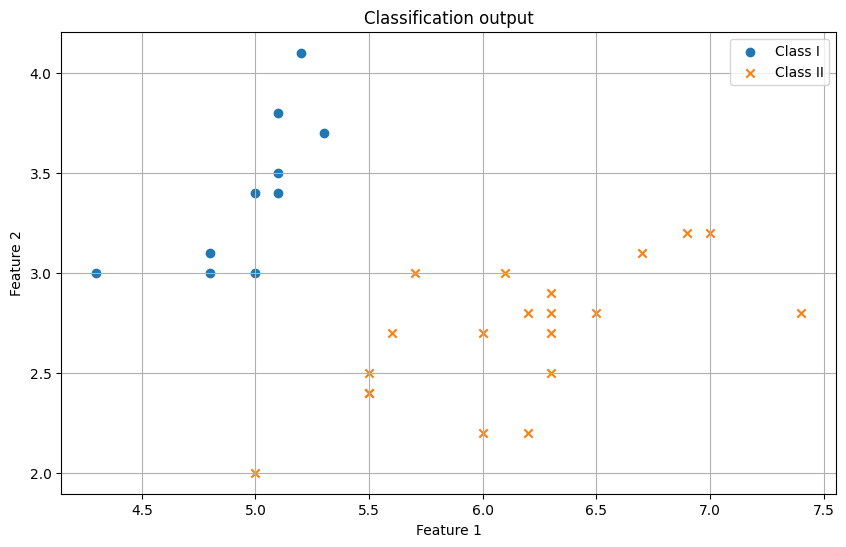

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], label='Class I', marker='o')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Class II', marker='x')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification output')
plt.legend()
plt.grid(True)
plt.show()
